In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

from IPython.core.display import display, HTML
from IPython.display import display, Markdown, Latex

display(HTML("<style>.container { width:70% !important; }</style>"))

%matplotlib inline

In [2]:
BASE_DATA_DIR = '/Users/dhrupadbhardwaj/Data/dsga1006/experiment_data/'

In [3]:
def load_exp(exp):
    df1 = pd.read_csv(os.path.join(BASE_DATA_DIR, exp[0]), index_col=0)
    df1['is_learned'] = df1['task'] < exp[1]
    return df1

In [4]:
def load_and_merge(exp1, exp2, suffixes, same_masks=True):
    df1 = load_exp(exp1) 
    df2 = load_exp(exp2)
    merged = df1.merge(df2, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'] + (['num_masks', 'is_learned'] if same_masks else []), suffixes=suffixes)
    return merged

# Effect of number of masks on performance recovery

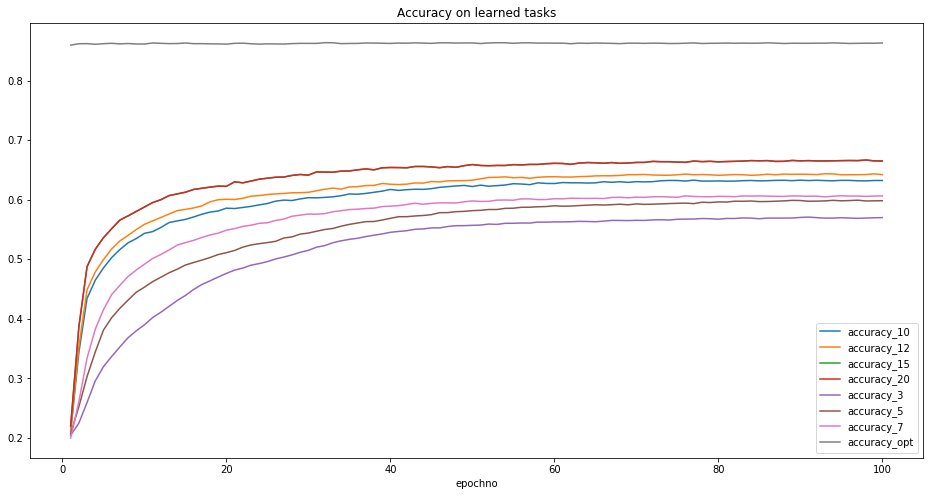

In [5]:
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_10_results.csv', 10)).rename(columns={'accuracy': 'accuracy_opt', 'train_loss': 'train_loss_opt', 'test_loss': 'test_loss_opt', 'num_masks': 'num_masks_opt', 'is_learned': 'is_learned_opt'})
m3 = load_exp(('slurm_supsup_basis_gpu_3_results.csv', 3)).rename(columns={'accuracy': 'accuracy_3', 'train_loss': 'train_loss_3', 'test_loss': 'test_loss_3', 'num_masks': 'num_masks_3', 'is_learned': 'is_learned_3'})
m5 = load_exp(('slurm_supsup_basis_gpu_5_results.csv', 5)).rename(columns={'accuracy': 'accuracy_5', 'train_loss': 'train_loss_5', 'test_loss': 'test_loss_5', 'num_masks': 'num_masks_5', 'is_learned': 'is_learned_5'})
m7 = load_exp(('slurm_supsup_basis_gpu_7_results.csv', 7)).rename(columns={'accuracy': 'accuracy_7', 'train_loss': 'train_loss_7', 'test_loss': 'test_loss_7', 'num_masks': 'num_masks_7', 'is_learned': 'is_learned_7'})
m10 = load_exp(('slurm_supsup_basis_gpu_10_results.csv', 10)).rename(columns={'accuracy': 'accuracy_10', 'train_loss': 'train_loss_10', 'test_loss': 'test_loss_10', 'num_masks': 'num_masks_10', 'is_learned': 'is_learned_10'})
m12 = load_exp(('slurm_supsup_basis_gpu_12_results.csv', 12)).rename(columns={'accuracy': 'accuracy_12', 'train_loss': 'train_loss_12', 'test_loss': 'test_loss_12', 'num_masks': 'num_masks_12', 'is_learned': 'is_learned_12'})
m15 = load_exp(('slurm_supsup_basis_gpu_15_results.csv', 15)).rename(columns={'accuracy': 'accuracy_15', 'train_loss': 'train_loss_15', 'test_loss': 'test_loss_15', 'num_masks': 'num_masks_15', 'is_learned': 'is_learned_15'})
m20 = load_exp(('slurm_supsup_basis_gpu_15_results.csv', 20)).rename(columns={'accuracy': 'accuracy_20', 'train_loss': 'train_loss_20', 'test_loss': 'test_loss_20', 'num_masks': 'num_masks_20', 'is_learned': 'is_learned_20'})

merged = m3.merge(m5, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m7, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m10, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m12, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m15, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m20, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])

merged[(merged['is_learned_opt'])].pivot_table(values=[c for c in merged.columns if c.startswith('accuracy')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

We begin by evaluating the signficiance of the number of masks on our model performance. As expect, more masks seem to do better to recover performance (the gray line being the optimal performance achieved by using the correct mask on the respective learned tasks). However, this graph does cheat a little, as the optimal performance is calulcated on tasks 0-9 and thus models with 3, 5 and 7 masks have an information disaddvantage for tasks >3 , >5 and >7 respectively.  

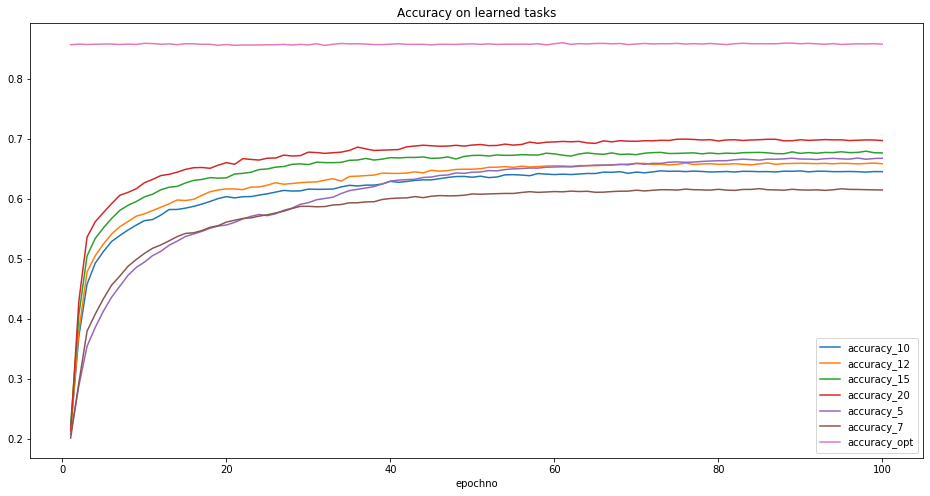

In [6]:
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_5_results.csv', 5)).rename(columns={'accuracy': 'accuracy_opt', 'train_loss': 'train_loss_opt', 'test_loss': 'test_loss_opt', 'num_masks': 'num_masks_opt', 'is_learned': 'is_learned_opt'})
m3 = load_exp(('slurm_supsup_basis_gpu_3_results.csv', 3)).rename(columns={'accuracy': 'accuracy_3', 'train_loss': 'train_loss_3', 'test_loss': 'test_loss_3', 'num_masks': 'num_masks_3', 'is_learned': 'is_learned_3'})
m5 = load_exp(('slurm_supsup_basis_gpu_5_results.csv', 5)).rename(columns={'accuracy': 'accuracy_5', 'train_loss': 'train_loss_5', 'test_loss': 'test_loss_5', 'num_masks': 'num_masks_5', 'is_learned': 'is_learned_5'})
m7 = load_exp(('slurm_supsup_basis_gpu_7_results.csv', 7)).rename(columns={'accuracy': 'accuracy_7', 'train_loss': 'train_loss_7', 'test_loss': 'test_loss_7', 'num_masks': 'num_masks_7', 'is_learned': 'is_learned_7'})
m10 = load_exp(('slurm_supsup_basis_gpu_10_results.csv', 10)).rename(columns={'accuracy': 'accuracy_10', 'train_loss': 'train_loss_10', 'test_loss': 'test_loss_10', 'num_masks': 'num_masks_10', 'is_learned': 'is_learned_10'})
m12 = load_exp(('slurm_supsup_basis_gpu_12_results.csv', 12)).rename(columns={'accuracy': 'accuracy_12', 'train_loss': 'train_loss_12', 'test_loss': 'test_loss_12', 'num_masks': 'num_masks_12', 'is_learned': 'is_learned_12'})
m15 = load_exp(('slurm_supsup_basis_gpu_15_results.csv', 15)).rename(columns={'accuracy': 'accuracy_15', 'train_loss': 'train_loss_15', 'test_loss': 'test_loss_15', 'num_masks': 'num_masks_15', 'is_learned': 'is_learned_15'})
m20 = load_exp(('slurm_supsup_basis_gpu_20_results.csv', 20)).rename(columns={'accuracy': 'accuracy_20', 'train_loss': 'train_loss_20', 'test_loss': 'test_loss_20', 'num_masks': 'num_masks_20', 'is_learned': 'is_learned_20'})

merged = opt.merge(m5, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m7, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m10, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m12, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m15, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m20, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])

merged[(merged['is_learned_opt'])].pivot_table(values=[c for c in merged.columns if c.startswith('accuracy')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

This chart above is a more fair comparison as the optimal is based on just tasks 0-4 and so for for all models with 5 and above masks, those tasks have the same amount information advantage. Still we see that more masks help, however 5 masks seem to do better than 7, 10 and 12.  

# Effect of number of masks on new tasks 

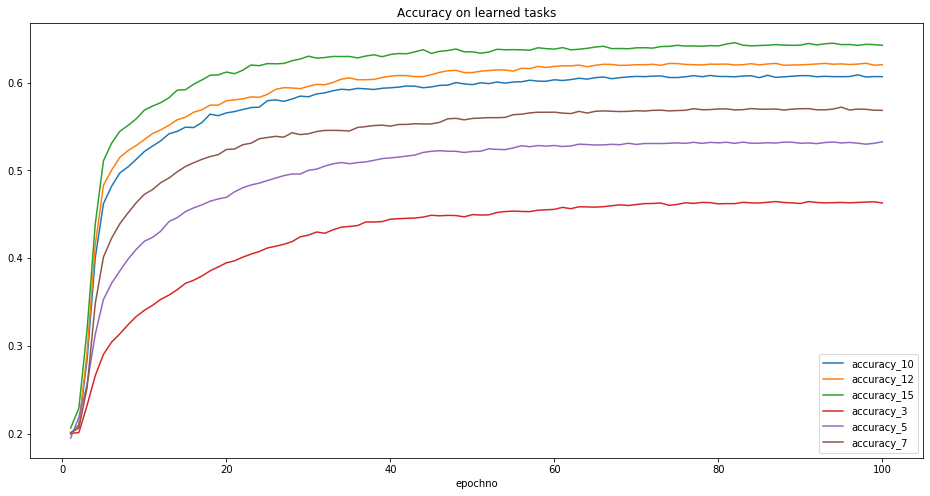

In [7]:
m3 = load_exp(('slurm_supsup_basis_gpu_3_results.csv', 3)).rename(columns={'accuracy': 'accuracy_3', 'train_loss': 'train_loss_3', 'test_loss': 'test_loss_3', 'num_masks': 'num_masks_3', 'is_learned': 'is_learned_3'})
m5 = load_exp(('slurm_supsup_basis_gpu_5_results.csv', 5)).rename(columns={'accuracy': 'accuracy_5', 'train_loss': 'train_loss_5', 'test_loss': 'test_loss_5', 'num_masks': 'num_masks_5', 'is_learned': 'is_learned_5'})
m7 = load_exp(('slurm_supsup_basis_gpu_7_results.csv', 7)).rename(columns={'accuracy': 'accuracy_7', 'train_loss': 'train_loss_7', 'test_loss': 'test_loss_7', 'num_masks': 'num_masks_7', 'is_learned': 'is_learned_7'})
m10 = load_exp(('slurm_supsup_basis_gpu_10_results.csv', 10)).rename(columns={'accuracy': 'accuracy_10', 'train_loss': 'train_loss_10', 'test_loss': 'test_loss_10', 'num_masks': 'num_masks_10', 'is_learned': 'is_learned_10'})
m12 = load_exp(('slurm_supsup_basis_gpu_12_results.csv', 12)).rename(columns={'accuracy': 'accuracy_12', 'train_loss': 'train_loss_12', 'test_loss': 'test_loss_12', 'num_masks': 'num_masks_12', 'is_learned': 'is_learned_12'})
m15 = load_exp(('slurm_supsup_basis_gpu_15_results.csv', 15)).rename(columns={'accuracy': 'accuracy_15', 'train_loss': 'train_loss_15', 'test_loss': 'test_loss_15', 'num_masks': 'num_masks_15', 'is_learned': 'is_learned_15'})
m20 = load_exp(('slurm_supsup_basis_gpu_15_results.csv', 20)).rename(columns={'accuracy': 'accuracy_20', 'train_loss': 'train_loss_20', 'test_loss': 'test_loss_20', 'num_masks': 'num_masks_20', 'is_learned': 'is_learned_20'})

merged = m3.merge(m5, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m7, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m10, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m12, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m15, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])

merged[(merged['task'] >= 15)].pivot_table(values=[c for c in merged.columns if c.startswith('accuracy')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

The equivalent analysis is now done on new tasks that the model hasn't seen before. As expected more masks help with 15 performing the best. We test the accuracy on tasks 15-19 here so that all models are on an even footing 

# Trained Masks vs Randomly Initialized Masks

In [8]:
# for num_tasks in [3,5,7,10,12,15]:
#     display(Markdown("## Analysis for {} basis masks.".format(num_tasks)))
#     merged = load_and_merge(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks), ('slurm_supsup_basis_gpu_randmask_{}_results.csv'.format(num_tasks), num_tasks),\
#                             ['_trained', '_random'], same_masks=True)
#     fig, axarr = plt.subplots(6,2, figsize=(20,30))
#     for i, sparsity in enumerate([1,2,4,8,16,32]):
#         merged[(merged['is_learned']) & (merged['sparsity'] == sparsity)].pivot_table(values=['accuracy_trained', 'accuracy_random'], index='epochno', columns=['task']).mean(axis=1, level=0)\
#         .plot(title="Trained vs Random masks for learned tasks (sparsity: {})".format(sparsity), ax=axarr[i][0])
#         merged[(~merged['is_learned']) & (merged['sparsity'] == sparsity)].pivot_table(values=['accuracy_trained', 'accuracy_random'], index='epochno', columns=['task']).mean(axis=1, level=0)\
#         .plot(title="Trained vs Random masks for new tasks (sparsity: {})".format(sparsity), ax=axarr[i][1])
#         axarr[i][0].set_ylabel('Accuracy')
#         axarr[i][1].set_ylabel('Accuracy')
#     plt.show()

The next experiment tries to asses the impact of actually training the Supsup masks beforehand rather than using just randomly initialized masks. The conclusion seems to point that there's a significant performance advantage for both seen and unseen tasks using pre-trained Supsup masks. 

## 3 basis masks.

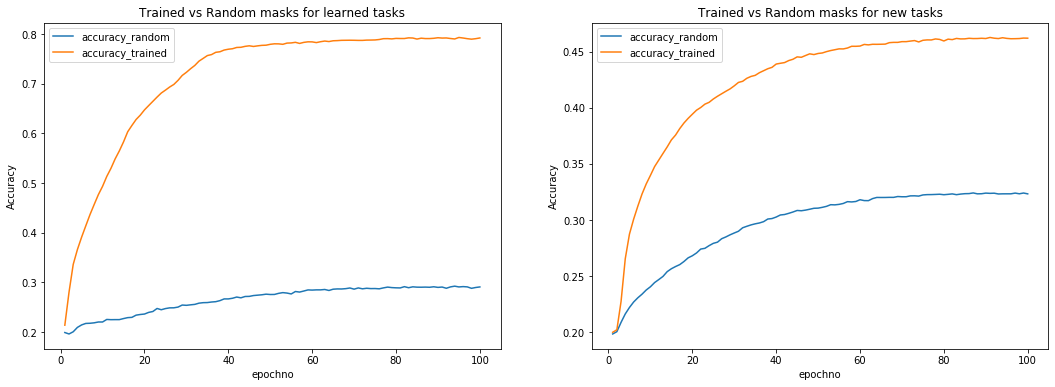

## 5 basis masks.

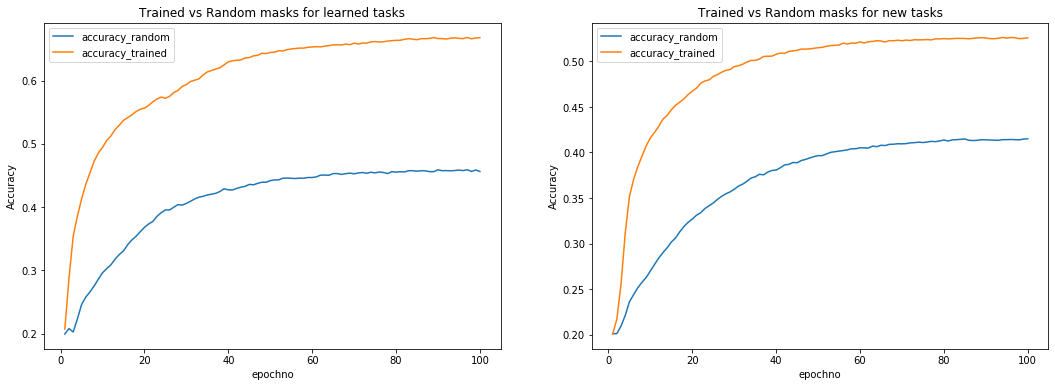

## 7 basis masks.

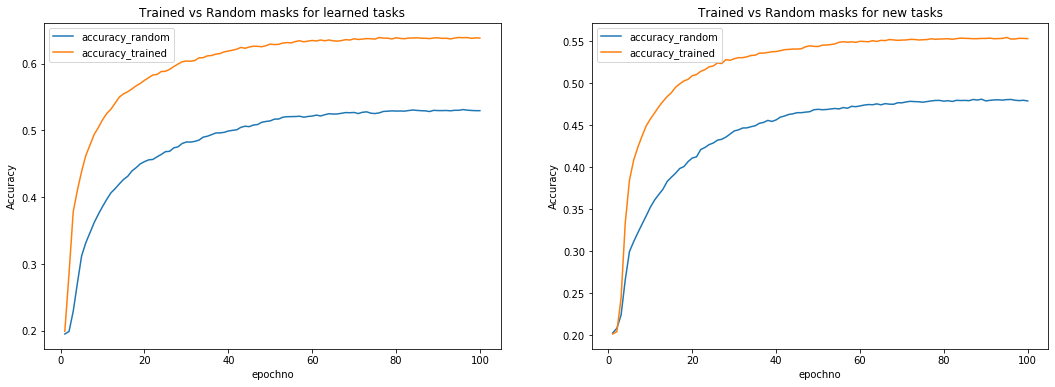

## 10 basis masks.

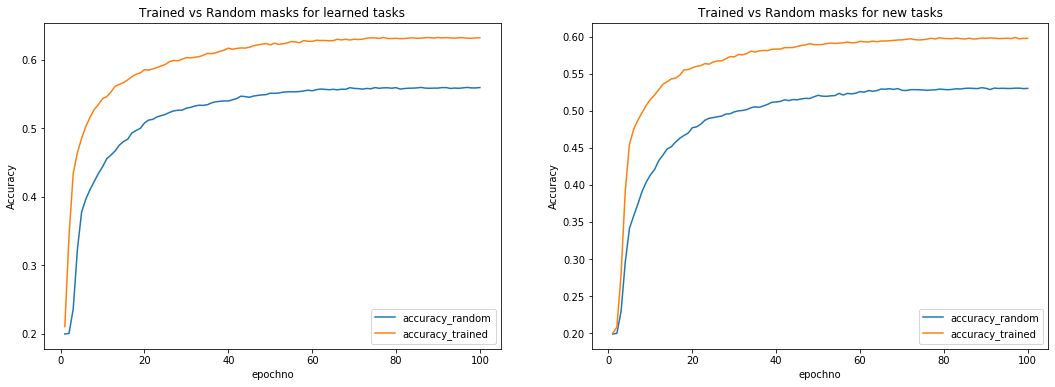

## 12 basis masks.

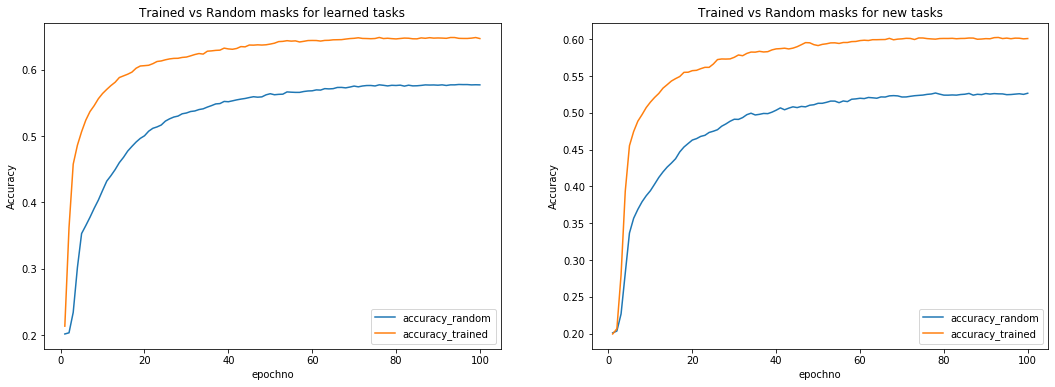

## 15 basis masks.

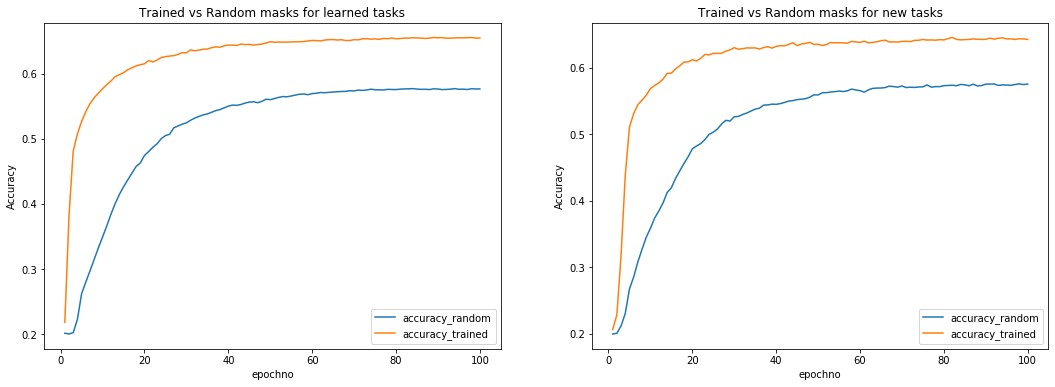

## 20 basis masks.

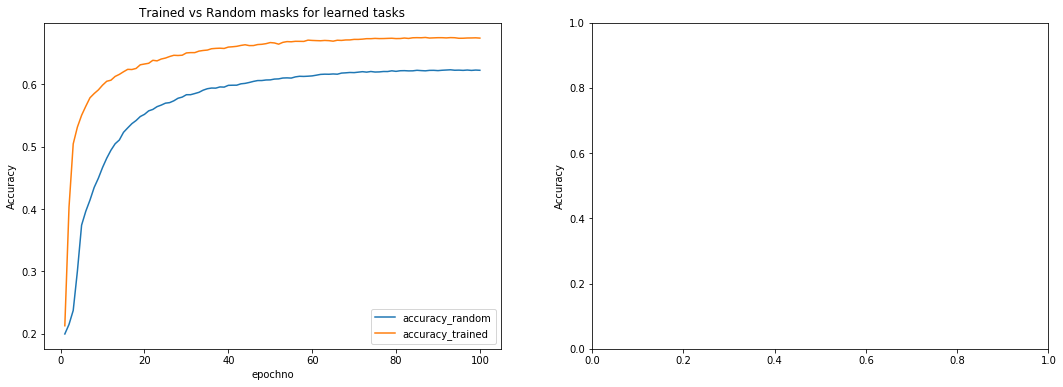

In [9]:
for num_tasks in [3,5,7,10,12,15, 20]:
    display(Markdown("## {} basis masks.".format(num_tasks)))
    merged = load_and_merge(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks), ('slurm_supsup_basis_gpu_randmask_{}_results.csv'.format(num_tasks), num_tasks),\
                            ['_trained', '_random'], same_masks=True)
    fig, axarr = plt.subplots(1,2, figsize=(18,6))
    merged[(merged['is_learned'])].pivot_table(values=['accuracy_trained', 'accuracy_random'], index='epochno', columns=['task']).mean(axis=1, level=0)\
    .plot(title="Trained vs Random masks for learned tasks", ax=axarr[0])
    if num_tasks < 20:
        merged[(~merged['is_learned'])].pivot_table(values=['accuracy_trained', 'accuracy_random'], index='epochno', columns=['task']).mean(axis=1, level=0)\
        .plot(title="Trained vs Random masks for new tasks", ax=axarr[1])
    axarr[0].set_ylabel('Accuracy')
    axarr[1].set_ylabel('Accuracy')
    plt.show()

One intersting thing is to note that the model with 3 masks seems to perform signficantly better at recovering seen task performance than the other models do. This probably has something to do with the simplicity of the loss surface given the number of parameters available to the optimizer. 

# Performance based on sparsity 

## 5 basis masks.

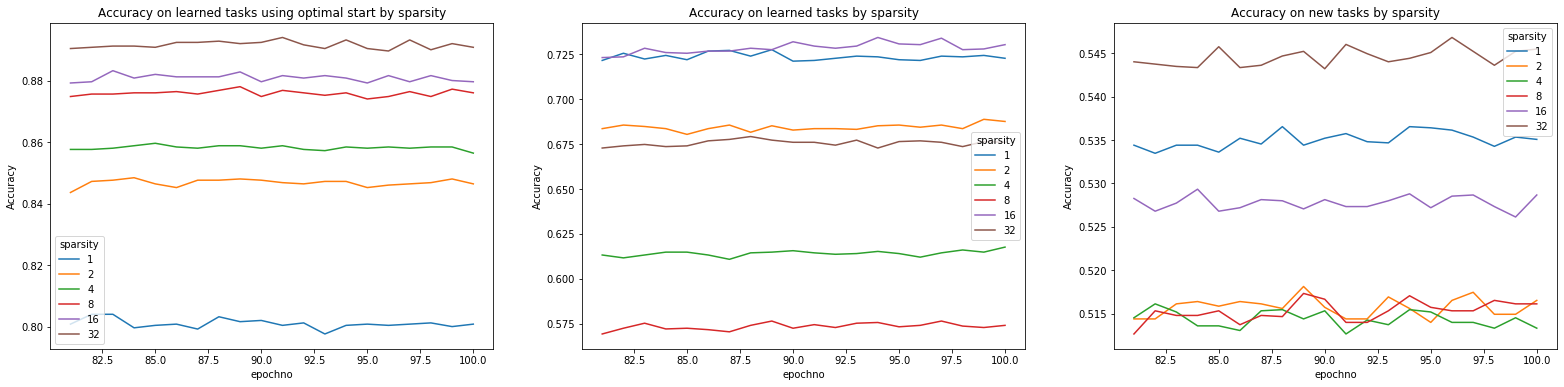

## 7 basis masks.

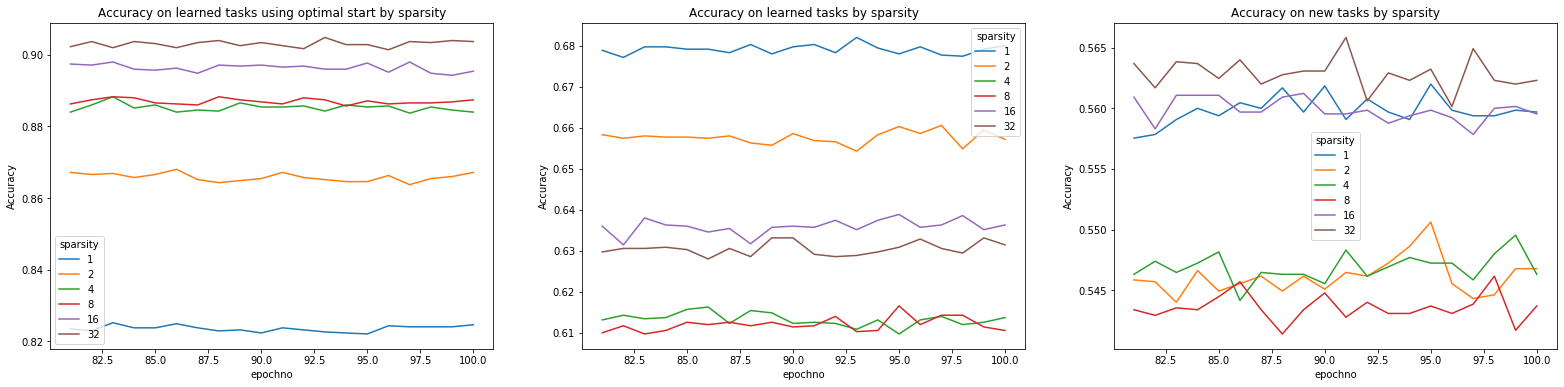

## 10 basis masks.

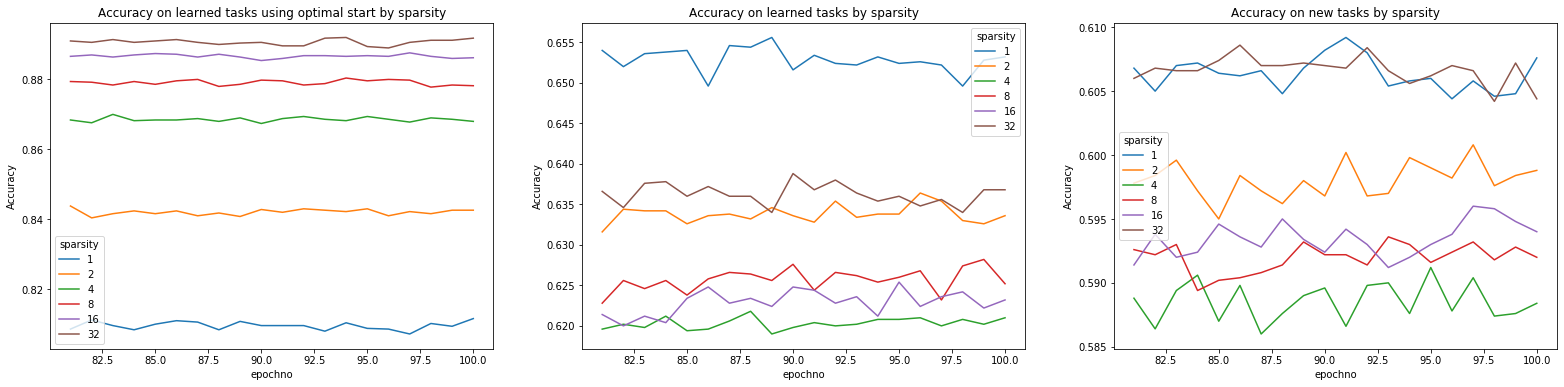

## 12 basis masks.

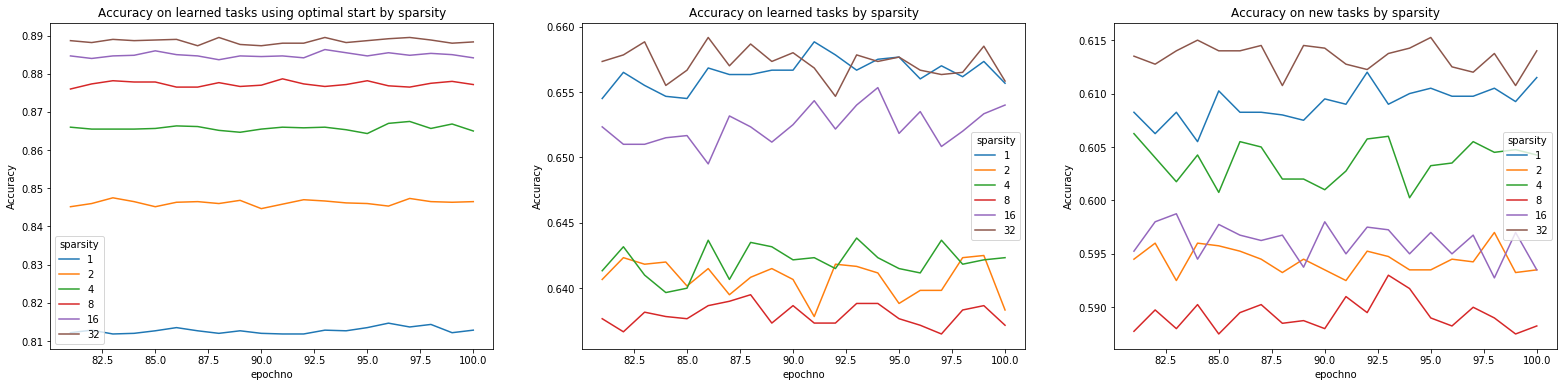

In [278]:
for num_tasks in [5,7,10,12]:
    display(Markdown("## {} basis masks.".format(num_tasks)))
    merged = load_and_merge(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks), ('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks),\
                            ['_optimal', '_standard'], same_masks=True)
    fig, axarr = plt.subplots(1,3, figsize=(27,6))
    merged[(merged['is_learned'])].pivot_table(values=['accuracy_optimal'], index='epochno', columns=['task', 'sparsity']).mean(axis=1, level=2).tail(20)\
    .plot(title="Accuracy on learned tasks using optimal start by sparsity", ax=axarr[0])
    merged[(merged['is_learned'])].pivot_table(values=['accuracy_standard'], index='epochno', columns=['task', 'sparsity']).mean(axis=1, level=2).tail(20)\
    .plot(title="Accuracy on learned tasks by sparsity", ax=axarr[1])
    merged[(~merged['is_learned'])].pivot_table(values=['accuracy_standard'], index='epochno', columns=['task', 'sparsity']).mean(axis=1, level=2).tail(20)\
    .plot(title="Accuracy on new tasks by sparsity", ax=axarr[2])
    axarr[0].set_ylabel('Accuracy')
    axarr[1].set_ylabel('Accuracy')
    axarr[2].set_ylabel('Accuracy')
    plt.show()

The charts above seek to analyze the relationship between sparsity and model perfomance. The first chart on the left shows the performance the Supsup model was able to achieve. We started from the optimal solution and trained our model, which doesn't really move the needle in terms of performance much (more on this below). That said, the interesting thing to note here is that sparser networks seem to do better in getting favorable performance when using Supsup alone.  

The middle chart shows the effect of sparsity on recovering the Supsup performance starting at a uniform guess for the seed masks. Here masks with the lowest sparsity seem to win out but sparsity 16 and 32 do well too. There might be a relationship between the number of seed masks and performance per sparsity, but more experimentation will be needed to evaluate this.

On new tasks though, the sparser netwroks seem to do better pretty consistently, although there is some variation. There may be some latent interaction here that lends supsup to train more versatile masks with higher sparsities. A good avenue for futher experimentation 

# Performance Analysis on Trained Tasks 

The charts below show if a linear combination of masks are able to get a better solution than just the correct mask via Supsup. In geenral there seems to be some benefit to conitnue training but the improvement is pretty minimal. Lower sparsities seem to improve more than higher ones. 

## 5 basis masks.

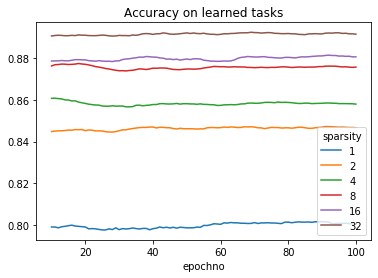

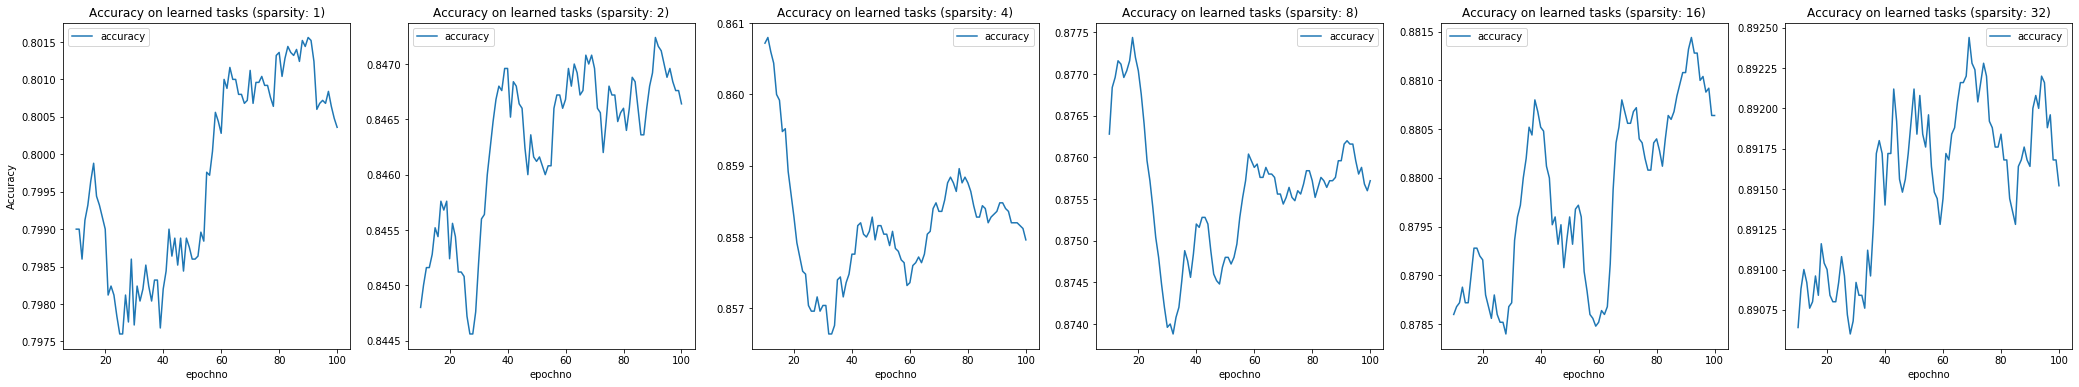

## 7 basis masks.

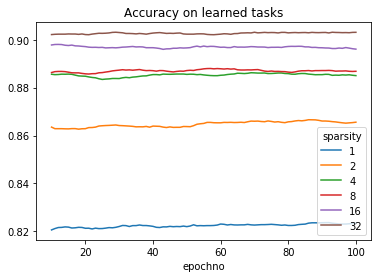

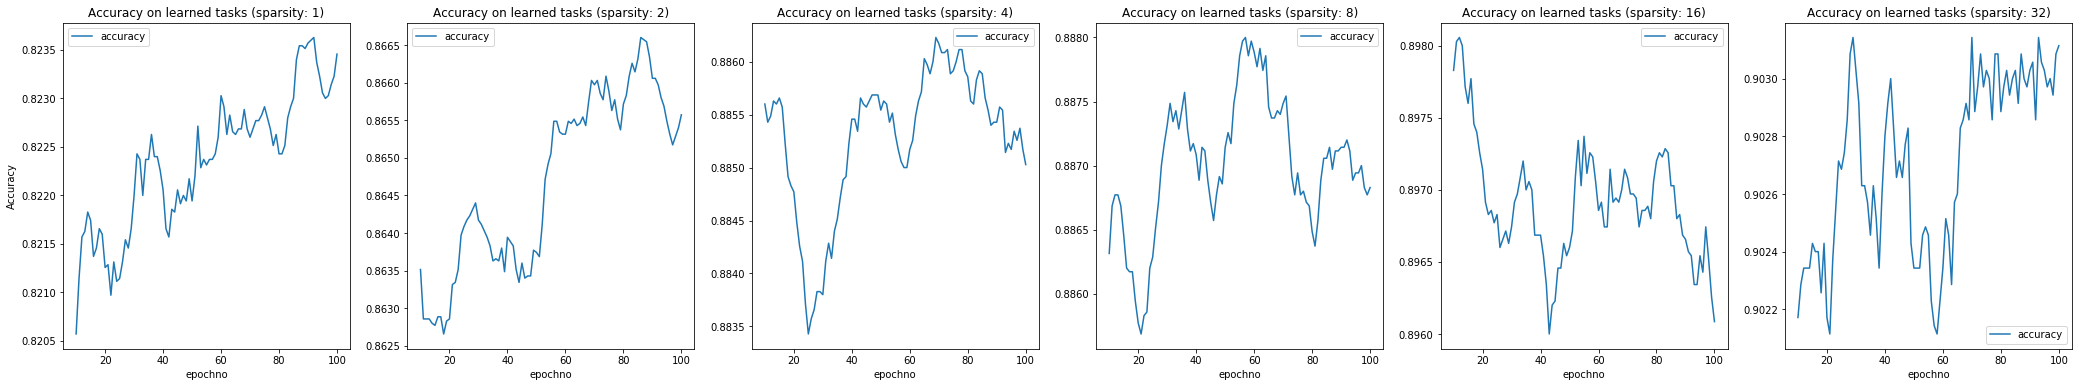

## 10 basis masks.

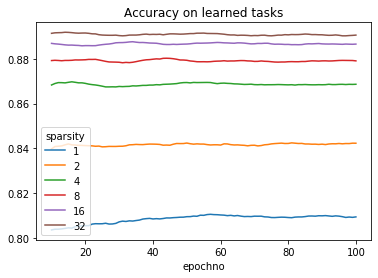

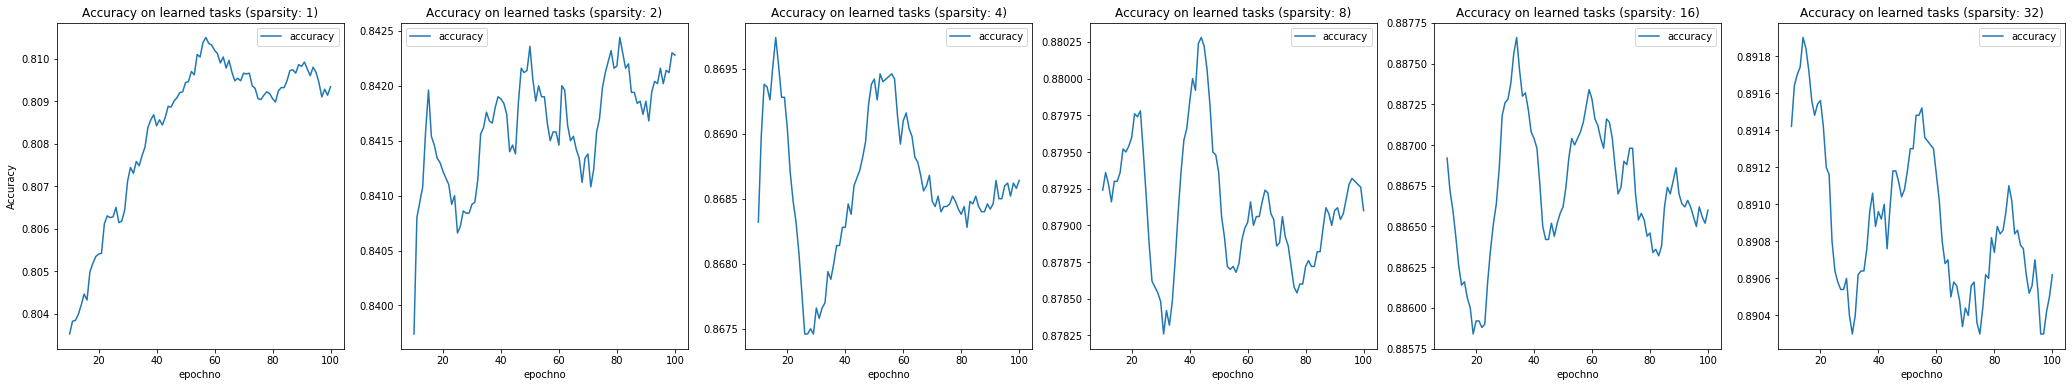

## 12 basis masks.

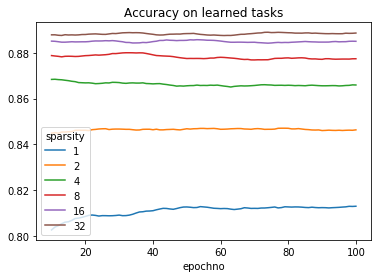

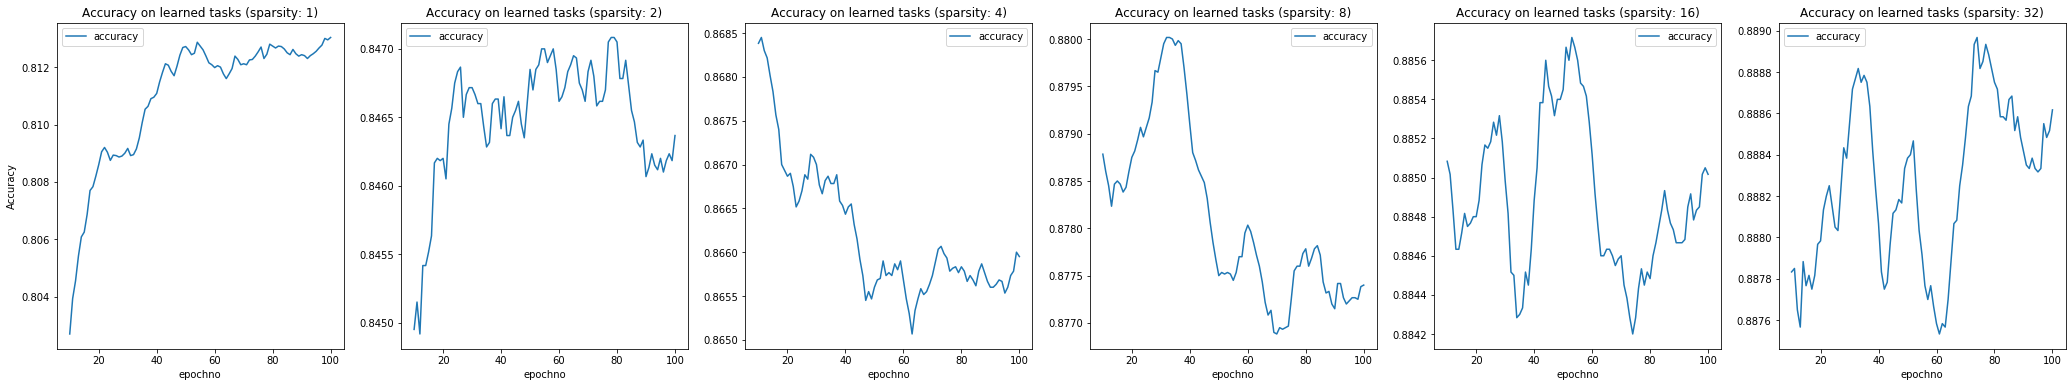

In [279]:
for num_tasks in [5,7,10,12]:
    display(Markdown("## {} basis masks.".format(num_tasks)))
    merged = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
    merged[(merged['is_learned'])].pivot_table(values=['accuracy'], index='epochno', columns=['task', 'sparsity']).mean(axis=1, level=2).rolling(window=10).mean()\
        .plot(title="Accuracy on learned tasks")
    fig, axarr = plt.subplots(1,6, figsize=(36,6))
    for i, sparsity in enumerate([1,2,4,8,16,32]):
        merged[(merged['is_learned']) & (merged['sparsity'] == sparsity)].pivot_table(values=['accuracy'], index='epochno', columns=['task']).mean(axis=1, level=0).rolling(window=10).mean()\
        .plot(title="Accuracy on learned tasks (sparsity: {})".format(sparsity), ax=axarr[i])
    axarr[0].set_ylabel('Accuracy')
    
    plt.show()

# Hyperparameter analysis based on performance recovery

## Comparing batch size 64 vs 32 vs the default (128) 

## 7 basis masks.

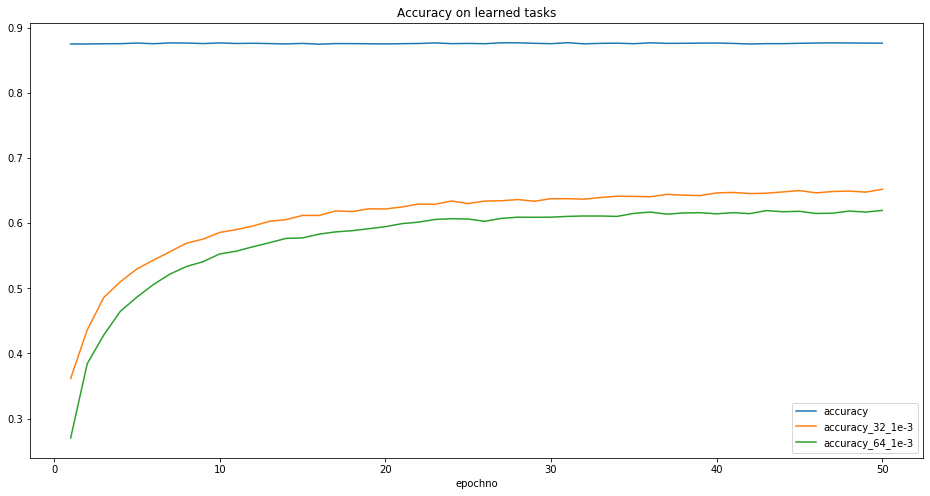

In [223]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
batch_32 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-3_75_results.csv'.format(num_tasks), num_tasks))
batch_64 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-3_50_results.csv'.format(num_tasks), num_tasks))
merged = batch_64.merge(batch_32, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_64_1e-3', '_32_1e-3'])\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])
merged[(merged['is_learned'])].pivot_table(values=['accuracy', 'accuracy_64_1e-3', 'accuracy_32_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

## Comparing learning rates for batch size 64 (as well as the basline)

## 7 basis masks.

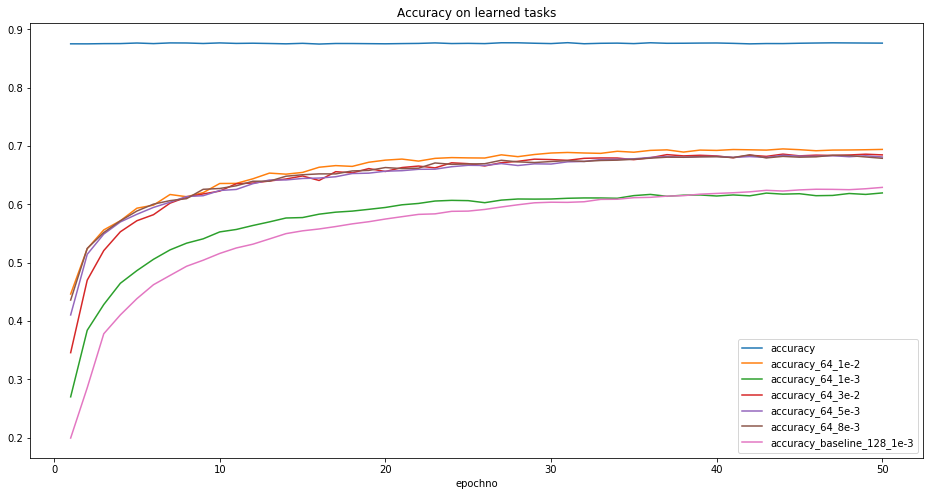

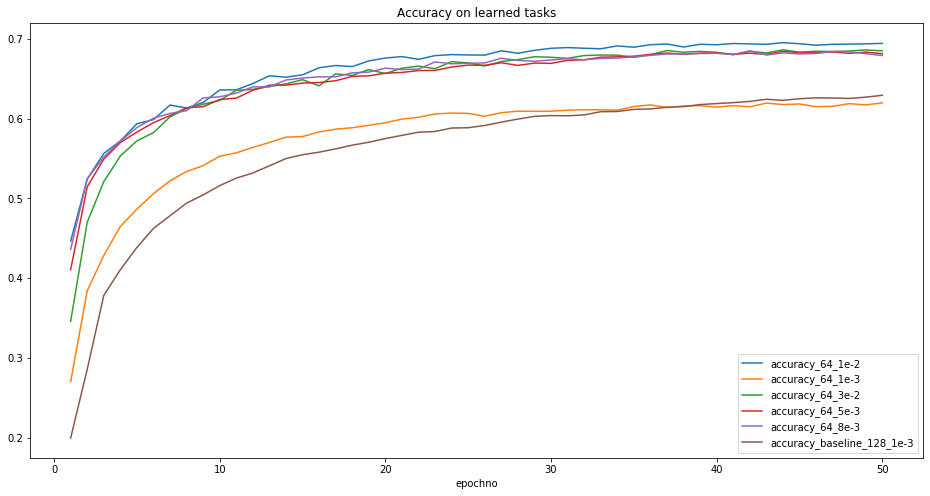

In [224]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
baseline = load_exp(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_baseline_128_1e-3'})
batch_641 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_3e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_3e-2'})
batch_642 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-2'})
batch_643 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_8e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_8e-3'})
batch_644 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_5e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_5e-3'})
batch_645 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-3'})

merged = batch_641.merge(batch_642, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_64_3e-2', '_64_1e-2'])\
     .merge(batch_643, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_644, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_645, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(baseline, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\

merged[(merged['is_learned'])].pivot_table(values=['accuracy', 'accuracy_64_3e-2', 'accuracy_64_1e-2', 'accuracy_64_8e-3', 'accuracy_64_5e-3', 'accuracy_64_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))
merged[(merged['is_learned'])].pivot_table(values=['accuracy_64_3e-2', 'accuracy_64_1e-2', 'accuracy_64_8e-3', 'accuracy_64_5e-3', 'accuracy_64_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

## Comparing learning rates for batch size 32 (as well as the basline)

## 7 basis masks.

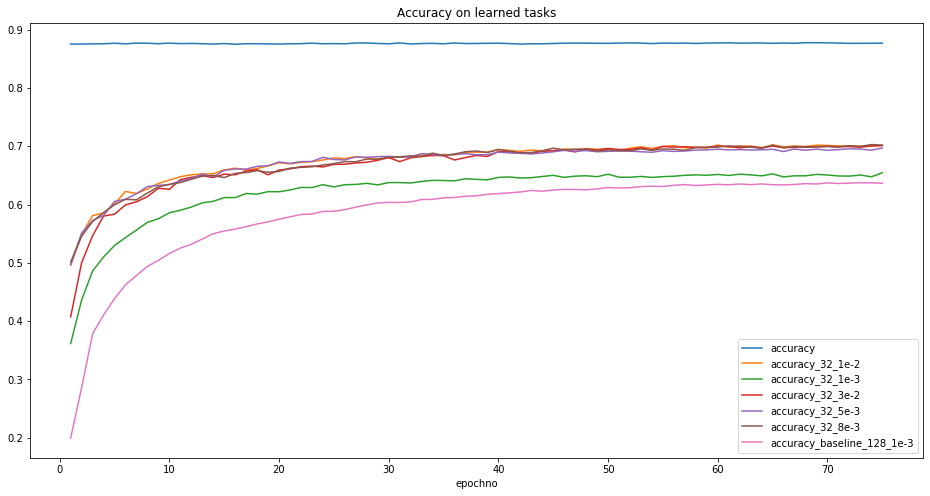

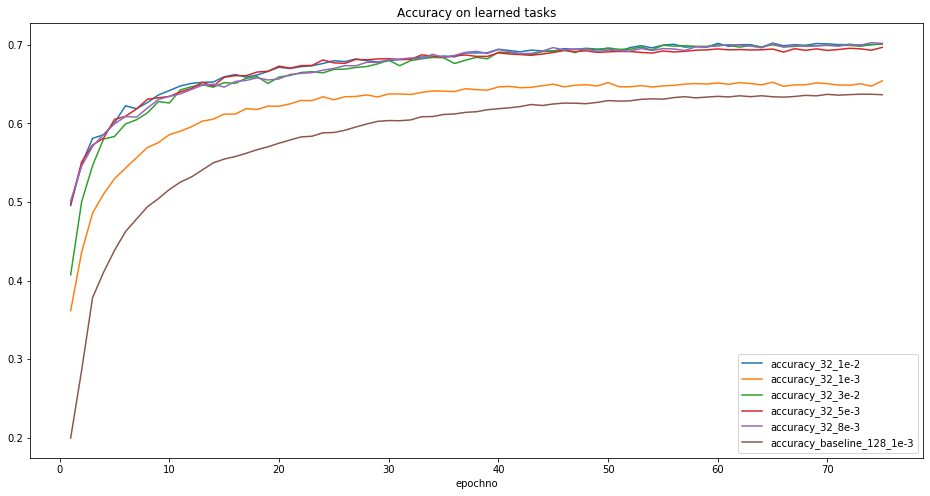

In [225]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
baseline = load_exp(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_baseline_128_1e-3'})
batch_321 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_3e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_3e-2'})
batch_322 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-2'})
batch_323 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_8e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_8e-3'})
batch_324 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_5e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_5e-3'})
batch_325 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-3'})

merged = batch_321.merge(batch_322, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_32_3e-2', '_32_1e-2'])\
     .merge(batch_323, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_324, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_325, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(baseline, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])

merged[(merged['is_learned'])].pivot_table(values=['accuracy', 'accuracy_32_3e-2', 'accuracy_32_1e-2', 'accuracy_32_8e-3', 'accuracy_32_5e-3', 'accuracy_32_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))
merged[(merged['is_learned'])].pivot_table(values=['accuracy_32_3e-2', 'accuracy_32_1e-2', 'accuracy_32_8e-3', 'accuracy_32_5e-3', 'accuracy_32_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

## Comparing all hyperparameter experiments

## 7 basis masks.

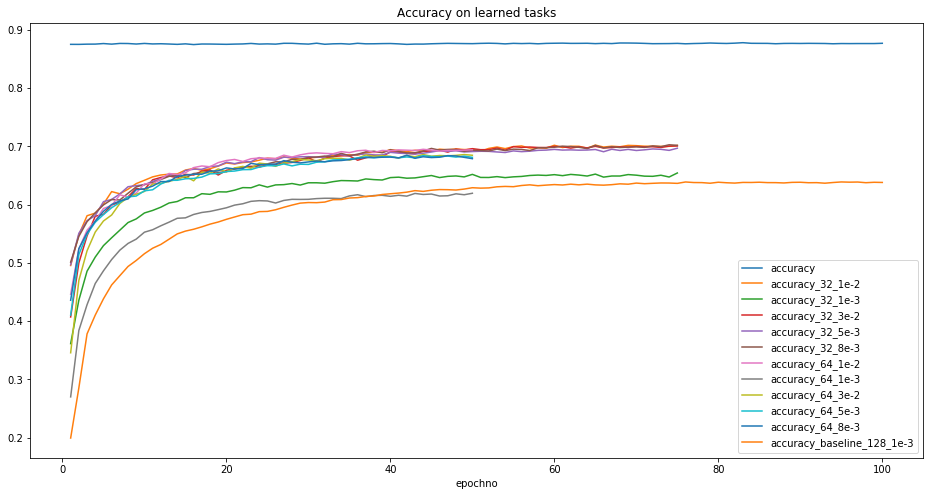

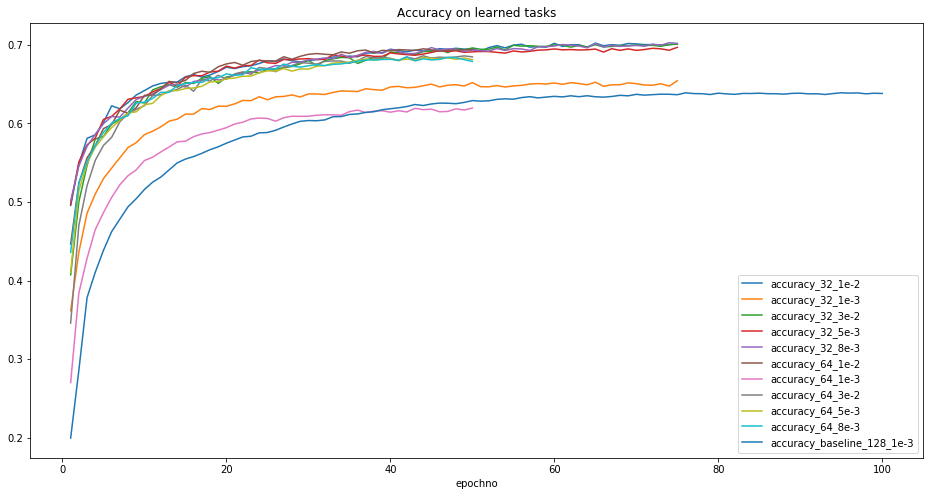

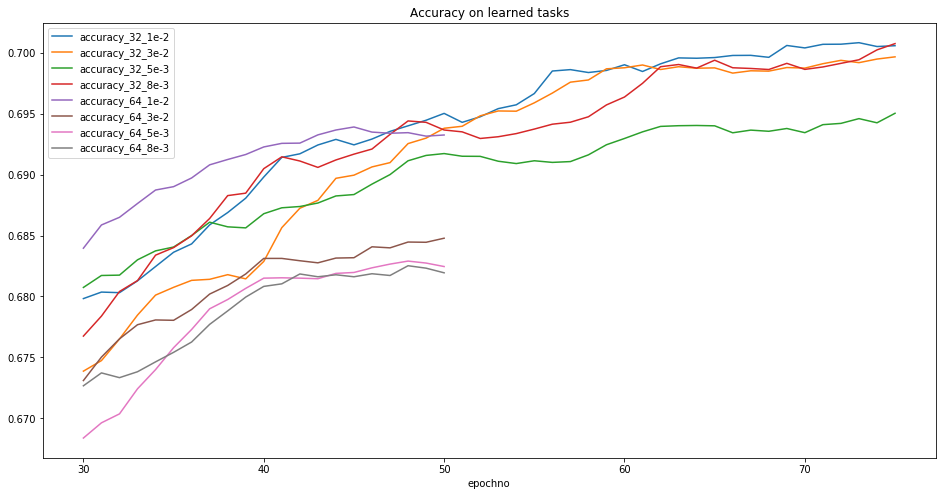

In [264]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
baseline = load_exp(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_baseline_128_1e-3'})
batch_321 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_3e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_3e-2'})
batch_322 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-2'})
batch_323 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_8e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_8e-3'})
batch_324 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_5e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_5e-3'})
batch_325 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-3'})

batch_641 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_3e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_3e-2'})
batch_642 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-2'})
batch_643 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_8e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_8e-3'})
batch_644 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_5e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_5e-3'})
batch_645 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-3'})

merged = batch_321.merge(batch_322, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_32_3e-2', '_32_1e-2'])\
     .merge(batch_323, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_324, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_325, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='right')\
     .merge(baseline, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_641, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_642, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_643, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_644, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_645, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')

merged[(merged['is_learned'])].pivot_table(values=[c for c in merged.columns if c.startswith('accuracy')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))
merged[(merged['is_learned'])].pivot_table(values=[c for c in merged.columns if c.startswith('accuracy_')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

merged[(merged['is_learned'])].pivot_table(values=['accuracy_32_3e-2', 'accuracy_32_1e-2', 'accuracy_32_8e-3', 'accuracy_32_5e-3', 'accuracy_64_3e-2', 'accuracy_64_1e-2', 'accuracy_64_8e-3', 'accuracy_64_5e-3'], index='epochno', columns=['task'])\
     .mean(axis=1, level=0)\
     .tail(50).rolling(window=5).mean()\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))


plt.show()

In general we see that reducing the batch size and increasing the learning rate both improve performance recovery on learned tasks. The experiments are not strictly apples to apples as the number of epochs vary (and looks like the accuracy trend is still sloping upwards), however a batch size of 64 and a learning rate of 0.01 seems to do well 

# Hyperparameter analysis on new tasks

## Comparing batch size 128 vs 64 vs 32 using default LR

## 7 basis masks.

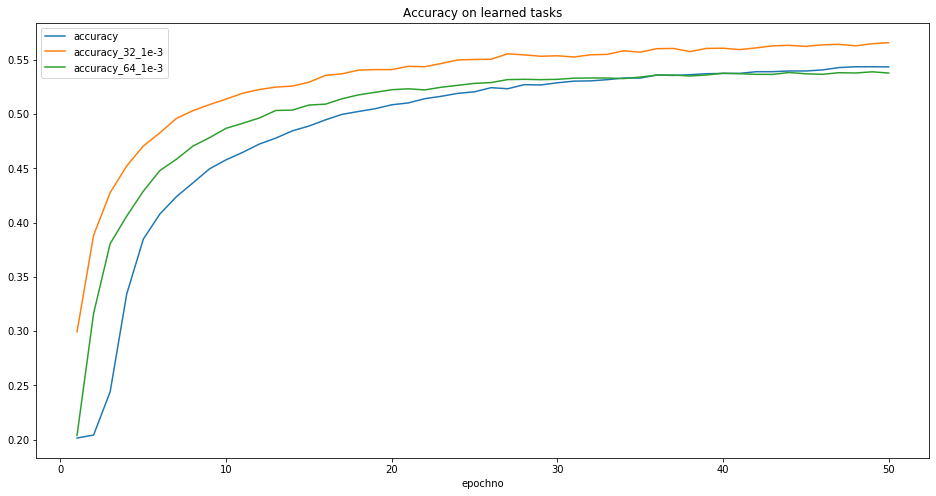

In [233]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
batch_32 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-3_75_results.csv'.format(num_tasks), num_tasks))
batch_64 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-3_50_results.csv'.format(num_tasks), num_tasks))
merged = batch_64.merge(batch_32, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_64_1e-3', '_32_1e-3'])\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])
merged[(~merged['is_learned'])].pivot_table(values=['accuracy', 'accuracy_64_1e-3', 'accuracy_32_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

## Comparing learning rates for batch size 64 (as well as the basline)

## 7 basis masks.

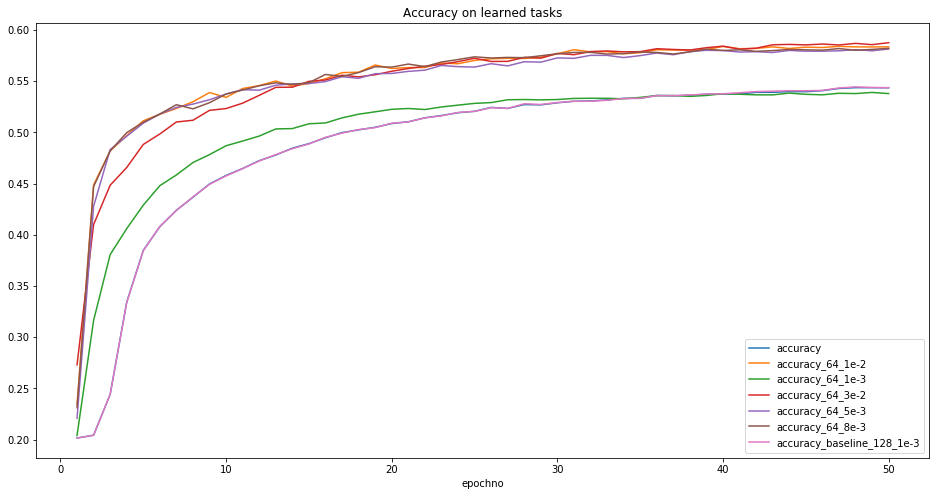

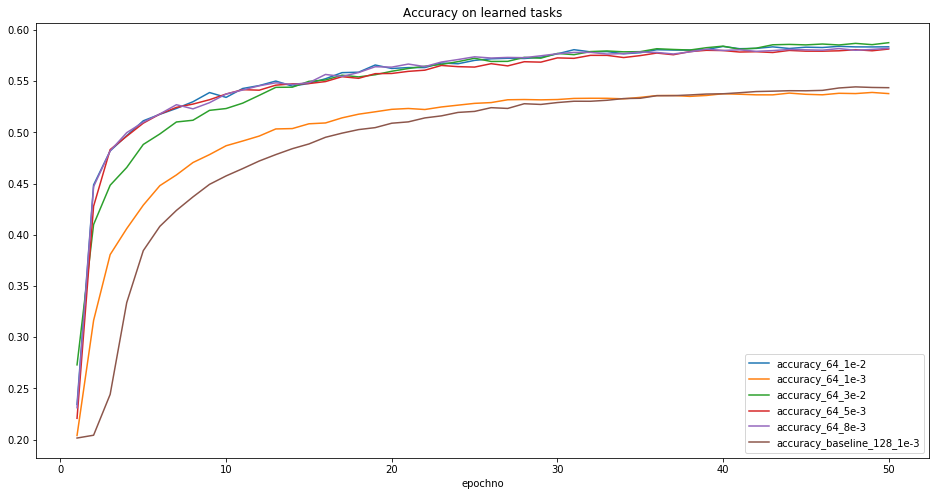

In [265]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
baseline = load_exp(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_baseline_128_1e-3'})
batch_641 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_3e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_3e-2'})
batch_642 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-2'})
batch_643 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_8e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_8e-3'})
batch_644 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_5e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_5e-3'})
batch_645 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-3'})

merged = batch_641.merge(batch_642, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_64_3e-2', '_64_1e-2'])\
     .merge(batch_643, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_644, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_645, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(baseline, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\

merged[(~merged['is_learned'])].pivot_table(values=['accuracy', 'accuracy_64_3e-2', 'accuracy_64_1e-2', 'accuracy_64_8e-3', 'accuracy_64_5e-3', 'accuracy_64_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))
merged[(~merged['is_learned'])].pivot_table(values=['accuracy_64_3e-2', 'accuracy_64_1e-2', 'accuracy_64_8e-3', 'accuracy_64_5e-3', 'accuracy_64_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

## Comparing learning rates for batch size 32 (as well as the basline)

## 7 basis masks.

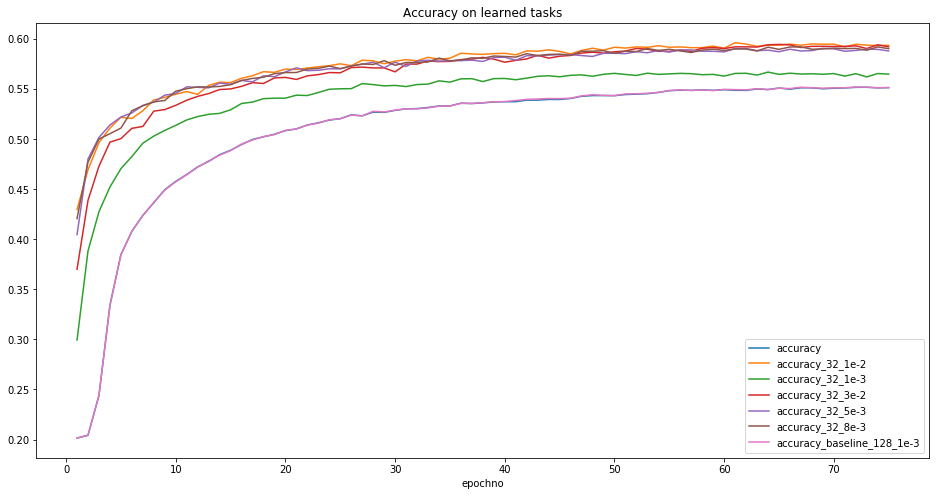

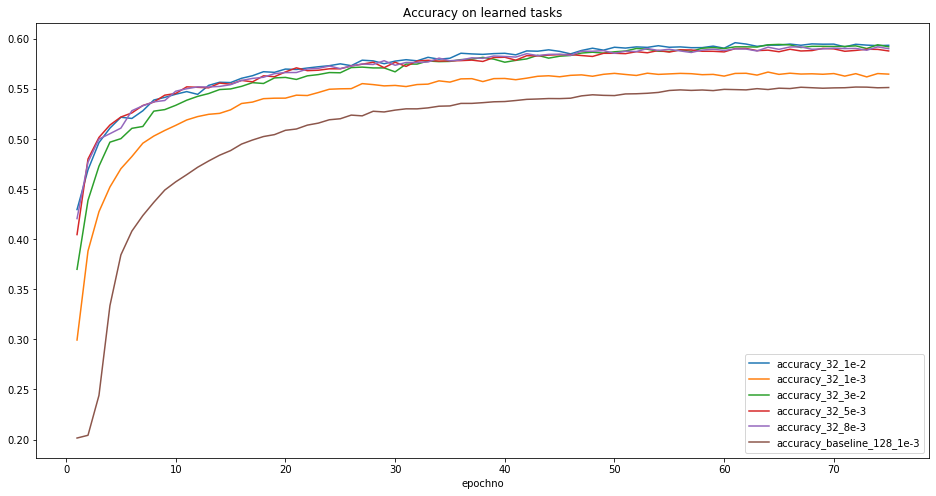

In [266]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
baseline = load_exp(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_baseline_128_1e-3'})
batch_321 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_3e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_3e-2'})
batch_322 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-2'})
batch_323 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_8e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_8e-3'})
batch_324 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_5e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_5e-3'})
batch_325 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-3'})

merged = batch_321.merge(batch_322, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_32_3e-2', '_32_1e-2'])\
     .merge(batch_323, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_324, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_325, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(baseline, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])

merged[(~merged['is_learned'])].pivot_table(values=['accuracy', 'accuracy_32_3e-2', 'accuracy_32_1e-2', 'accuracy_32_8e-3', 'accuracy_32_5e-3', 'accuracy_32_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))
merged[(~merged['is_learned'])].pivot_table(values=['accuracy_32_3e-2', 'accuracy_32_1e-2', 'accuracy_32_8e-3', 'accuracy_32_5e-3', 'accuracy_32_1e-3', 'accuracy_baseline_128_1e-3'], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

## Comparing all hyperparameter experiments

## 7 basis masks.

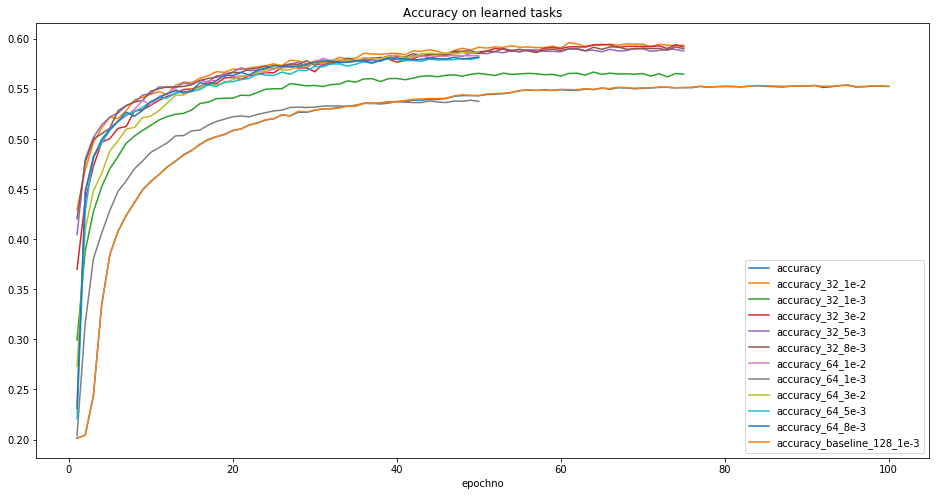

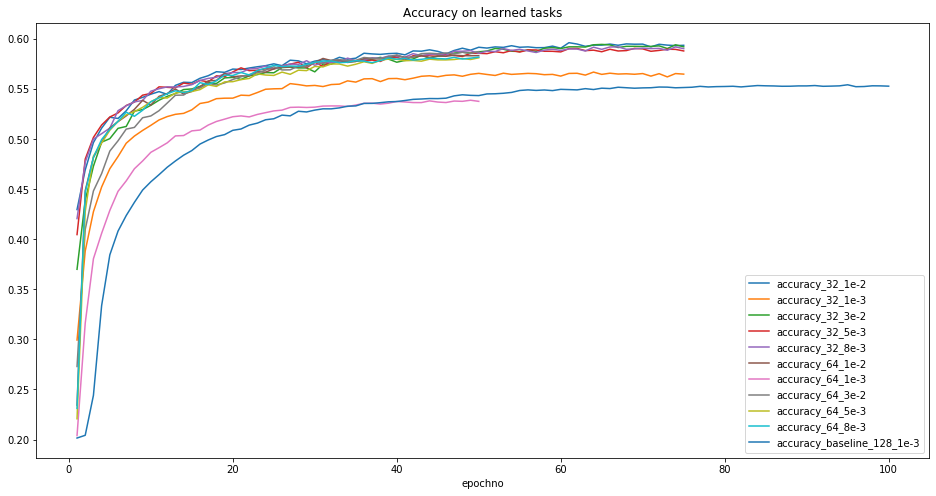

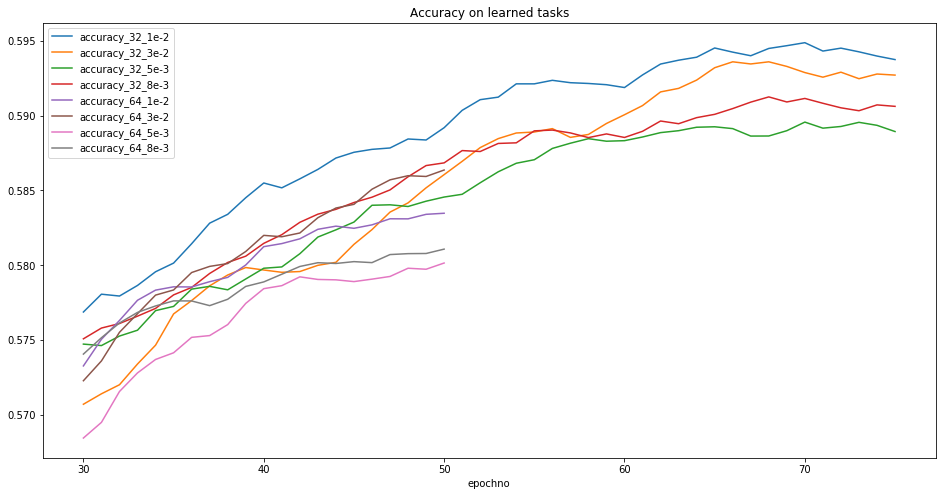

In [267]:
num_tasks = 7
display(Markdown("## {} basis masks.".format(num_tasks)))
opt = load_exp(('slurm_supsup_basis_gpu_optimal_start_{}_results.csv'.format(num_tasks), num_tasks))
baseline = load_exp(('slurm_supsup_basis_gpu_{}_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_baseline_128_1e-3'})
batch_321 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_3e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_3e-2'})
batch_322 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-2_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-2'})
batch_323 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_8e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_8e-3'})
batch_324 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_5e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_5e-3'})
batch_325 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_32_1e-3_75_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_32_1e-3'})

batch_641 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_3e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_3e-2'})
batch_642 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-2_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-2'})
batch_643 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_8e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_8e-3'})
batch_644 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_5e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_5e-3'})
batch_645 = load_exp(('slurm_supsup_basis_gpu_{}_hyperparams_64_1e-3_50_results.csv'.format(num_tasks), num_tasks)).rename(columns={'accuracy': 'accuracy_64_1e-3'})

merged = batch_321.merge(batch_322, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], suffixes=['_32_3e-2', '_32_1e-2'])\
     .merge(batch_323, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_324, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'])\
     .merge(batch_325, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(opt, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='right')\
     .merge(baseline, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_641, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_642, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_643, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_644, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')\
     .merge(batch_645, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID', 'num_masks', 'is_learned'], how='left')

merged[(~(merged['is_learned'].astype(bool)))].pivot_table(values=[c for c in merged.columns if c.startswith('accuracy')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))
merged[(~(merged['is_learned'].astype(bool)))].pivot_table(values=[c for c in merged.columns if c.startswith('accuracy_')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

merged[(~(merged['is_learned'].astype(bool)))].pivot_table(values=['accuracy_32_3e-2', 'accuracy_32_1e-2', 'accuracy_32_8e-3', 'accuracy_32_5e-3', 'accuracy_64_3e-2', 'accuracy_64_1e-2', 'accuracy_64_8e-3', 'accuracy_64_5e-3'], index='epochno', columns=['task'])\
     .mean(axis=1, level=0)\
     .tail(50).rolling(window=5).mean()\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))


plt.show()

Same story as above, here batch size 64 and LR 0.03 works better but in general both experiments point to the fact that reducing the batch size and using a higher learning rate will yield better reuslts.